# prediction using supervised learning

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [146]:
df.sample(5)

,Hours,Scores
5,1.5,20
12,4.5,41
22,3.8,35
24,7.8,86
2,3.2,27


Text(0, 0.5, 'Scores')

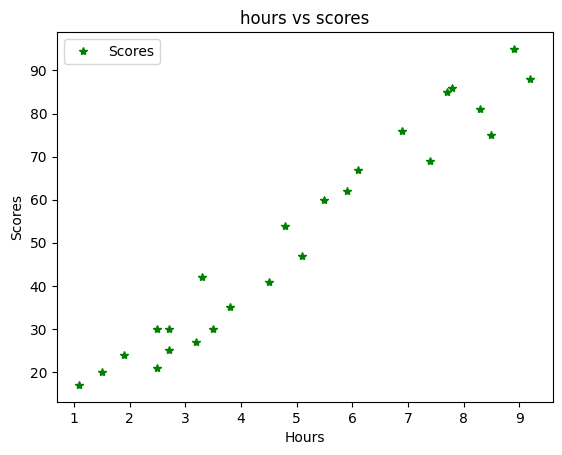

In [147]:
df.plot(x='Hours',y='Scores',style='*',color='green')
plt.title('hours vs scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

In [148]:
x=df.iloc[:,:-1]
y=df.iloc[:,1]

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
lr=LinearRegression()

In [153]:
lr.fit(x_train,y_train)

LinearRegression()

In [154]:
y_pred=lr.predict(x_test)

# see the comparison between actual and predicted

In [155]:
df=pd.DataFrame({'actual':y_test,
             'predicted':y_pred})

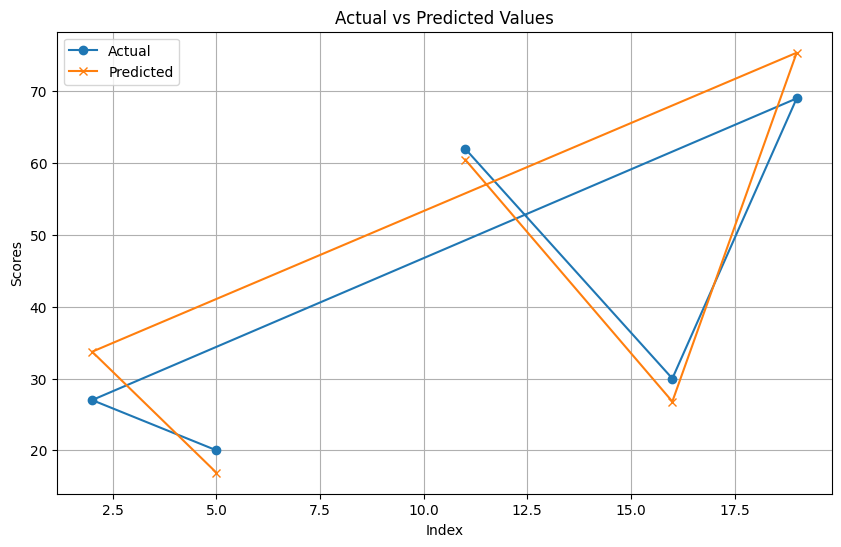

In [156]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['actual'], label='Actual', marker='o')
plt.plot(df.index, df['predicted'], label='Predicted', marker='x')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Scores')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [157]:
df


,actual,predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [158]:
from sklearn.metrics import mean_absolute_error

In [159]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


# checkout the model performance

In [160]:
from sklearn.metrics import r2_score

In [161]:
r2score=r2_score(y_test,y_pred)

In [162]:
print(r2score)

0.9454906892105355


In [163]:
import joblib

In [164]:
joblib.dump(lr,'model.joblib')

['model.joblib']

In [165]:
saved_model=joblib.load("model.joblib")
saved_model

LinearRegression()

In [166]:
y_pred=saved_model.predict(x_test)
r2_score(y_test,y_pred)

0.9454906892105355